# Assignment 3
This assignment deals with using `textblob` and other open-source libraries to perform NLP-based analysis on documents using Python.  **All parts should use the same three documents (as outlined in Part 1 below).  In addition to your .ipynb and/or .py files, you must submit the three documents in .txt format, as well as a report document in .txt/.pb format that answers various questions below.  It is not necessary to submit the .csv file for Part 3, since we will be executing your code.  _Just make sure it works correctly!_**  

**Part 1:**<br> Select and download three texts of your choosing that represent different media or writing formats (for example, you could choose i. a novel, movie script, and play script or ii. a short story, poem, and novel, etc.)
**Make sure you briefly descibe your documents and explain the difference between them in a paragraph.** 


**Part 2:**<br>
(a) Compute word counts for each of your documents after excluding English stop words (and optionally, performing lemmatization and/or other preprocessing that you would like to employ).<br>
(b) Create and display a bar plot for each document that include word counts for the 25 most frequent words (after the above processing).<br>
(c) Create and display a word cloud for each document (using a mask image of your choice) that includes only the 100 most frequent words.  Note that you'll likely want to use the approach outlined in Session 25 that utilizes the `fitwords` method, since you will want data consistent with those for part (b).<br>(d) Do you see any notable difference between the documents wrt (b) and/or (c) above?  Try to explain why or why not, and whether or not these results are expected.<br>


The word count of The Prince is:
13748


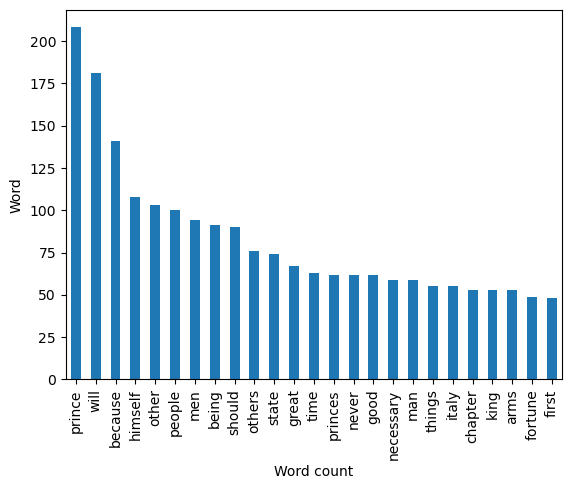

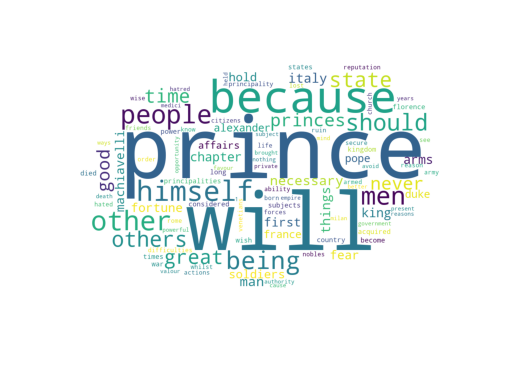

The word count of Interstellar is:
17082


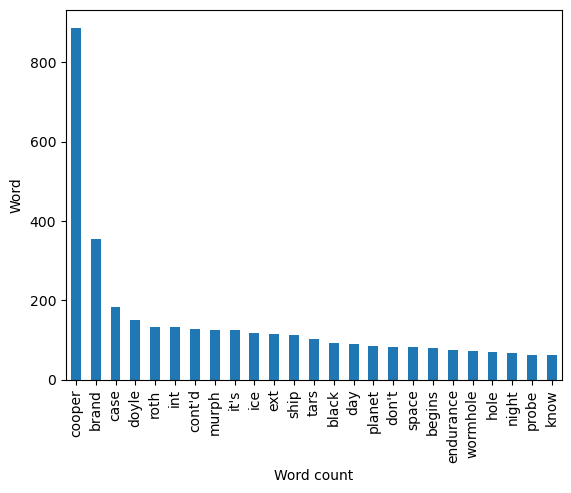

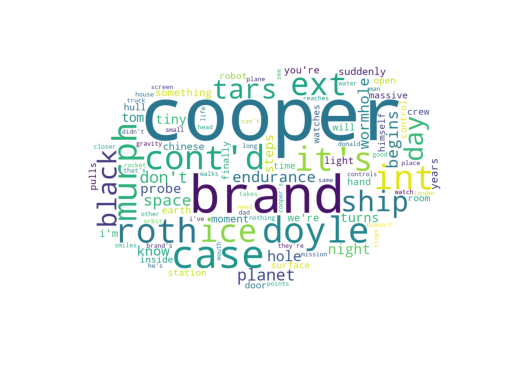

The word count of Romeo and Juliet is:
11999


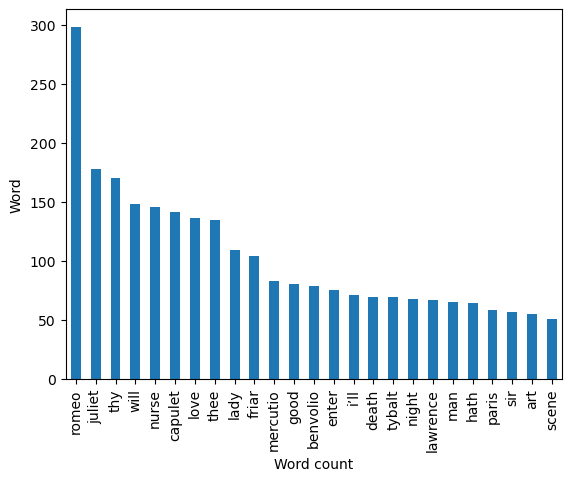

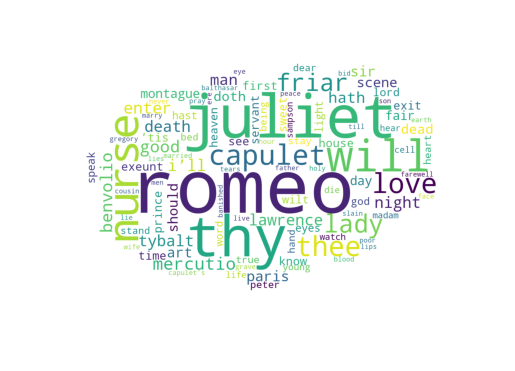

In [10]:
from io import TextIOWrapper
import itertools
import string
from typing import OrderedDict
from textblob import TextBlob
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import imageio

prince = open('pg1232.txt', 'r', encoding='utf-8-sig')
interstellar = open('interstellar.txt', 'r', encoding='utf-8-sig')
romeojuliet = open('pg1513.txt', 'r', encoding='utf-8-sig')

stop_words = []

def read_file(file: TextIOWrapper): # read file and return list of words
    words = []
    for line in file:
        for word in line.split():
            words.append(word.lower())
    return words

def preprocess(text):
    for i in range(len(text)):
        text[i] = text[i].strip(string.punctuation) # remove punctuation

    stopwords = open('stop_words.txt', 'r')
    exec(stopwords.read(), globals())
    stopwords.close()
    remove_blanks = [word for word in text if word != ''] # remove blanks
    usablewords = [word for word in remove_blanks if word not in stop_words] # remove stopwords
    return usablewords

def word_count(text): # count number of words in list (Part A)
    print(len(text))

def bar_plot(text): # create bar plot of word frequency (Part B)
    dataframe = pd.DataFrame(text, columns=['word'])
    fig, ax = plt.subplots() 
    counts = dataframe['word'].value_counts().head(25) # get top 25 words
    counts.plot(kind='bar', ax=ax) # plot horizontal bar chart
    ax.set_ylabel('Word') 
    ax.set_xlabel('Word count')
    plt.show() # show plot in order
    
def wordcloud(text): # Create word cloud of 100 most common words (Part C)
    dataframe = pd.DataFrame(text, columns=['word'])
    sorted_items = dataframe['word'].value_counts().to_dict() # sort by frequency
    sorted_items = OrderedDict(itertools.islice(sorted_items.items(), 100))
    mask_image = imageio.v2.imread('cloud.png') # cloud mask image 
    wordcloud = WordCloud(width=1000, height=1000, mask=mask_image, background_color='white') # create word cloud
    wc = wordcloud.fit_words(sorted_items) # fit words to cloud
    plt.imshow(wc) 
    plt.axis("off")
    plt.show()

def main():
    prince_words = read_file(prince)
    prince_processed = preprocess(prince_words)
    print('The word count of The Prince is:')
    word_count(prince_processed)
    bar_plot(prince_processed)
    wordcloud(prince_processed)
    interstellar_words = read_file(interstellar)
    interstellar_processed = preprocess(interstellar_words)
    print('The word count of Interstellar is:')
    word_count(interstellar_processed)
    bar_plot(interstellar_processed)
    wordcloud(interstellar_processed)
    romeojuliet_words = read_file(romeojuliet)
    romeojuliet_processed = preprocess(romeojuliet_words)
    print('The word count of Romeo and Juliet is:')
    word_count(romeojuliet_processed)
    bar_plot(romeojuliet_processed)
    wordcloud(romeojuliet_processed)

if __name__ == '__main__':
    main()


**Part 3:**<br>
(a) Using your approach from **Part 2**, compute the 25 most _cumulatively commmon_ words across the three documents, along with the _cumulative counts_.  Remember that a given word can appear in 2 or even all 3 documents.  <br>
Ex: if the word "spider" appears 10 times in document 1, 6 times in document 2, and 5 times in document 3, its cumulative count will be 21.<br>
(b) Create a CSV file named **MCW.csv** with the following specifications:
i. The csv file should use the standard delimiter (,) <br> 
ii. The first row in the file should be a column header row denoted by the string "Word,Count" <br>
iii. The next 25 rows should be populated with the pairs of the 25 most cumulatively common words and counts, in descending order by count. <br>
iv. One final row should added of the form "Sum,(totalcount)" where (totalcount) represents the sum of the top 25 cumulative counts.<br>
A sample csv file is included to give you an idea of what to generate in practice.<br><br>


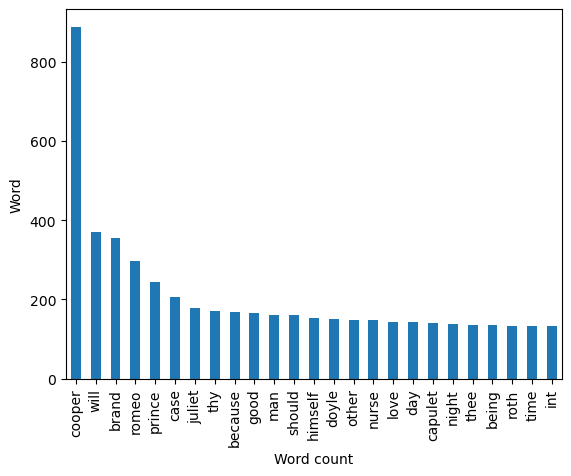

word
cooper     888
will       371
brand      354
romeo      298
prince     245
case       206
juliet     178
thy        170
because    168
good       167
man        160
should     160
himself    154
doyle      150
other      149
nurse      147
love       142
day        142
capulet    141
night      138
thee       135
being      135
roth       133
time       132
int        132
Name: count, dtype: int64


In [30]:
prince = open('pg1232.txt', 'r', encoding='utf-8-sig')
interstellar = open('interstellar.txt', 'r', encoding='utf-8-sig')
romeojuliet = open('pg1513.txt', 'r', encoding='utf-8-sig')

def cummulative_counts(text): # get top 25 words in all texts (Part A)
    dataframe = pd.DataFrame(text, columns=['word'])
    counts = dataframe['word'].value_counts().head(25) # get top 25 words
    print(counts)

def most_common(text):
    dataframe = pd.DataFrame(text, columns=['word'])
    counts = dataframe['word'].value_counts().head(25) # get top 25 words
    counts.to_csv('MCW.csv')
    csv = open('MCW.csv', 'a')
    csv.write('Sum,' + str(counts.sum()))

def main():
    prince_words = read_file(prince)
    prince_processed = preprocess(prince_words)
    interstellar_words = read_file(interstellar)
    interstellar_processed = preprocess(interstellar_words)
    romeojuliet_words = read_file(romeojuliet)
    romeojuliet_processed = preprocess(romeojuliet_words)
    all_words = prince_processed + interstellar_processed + romeojuliet_processed
    bar_plot(all_words)
    cummulative_counts(all_words)
    most_common(all_words)

if __name__ == '__main__':
    main()

**Part 4:**<br>
(a) Use **Textatistic** to compute the _average_ of the Flesch–Kincaid, Gunning Fog, SMOG, and Dale–Chall scores for each document.   
(b) Are there noticeable differences among your documents's readability scores, and would you expect these differences (or lack of differences, if there are none) to be present among documents were you judging their readability manually?


In [39]:
from textatistic import Textatistic
from pathlib import Path

prince = Path('pg1232.txt').read_text(encoding='utf-8-sig')
interstellar = Path('interstellar.txt').read_text(encoding='utf-8-sig')
romeojuliet = Path('pg1513.txt').read_text(encoding='utf-8-sig')

def average_scores(text):
    readability = Textatistic(text)
    average_score = (readability.fleschkincaid_score + readability.gunningfog_score + readability.smog_score + readability.dalechall_score) / 4
    print('The average readability score is:', average_score)
    return average_score

prince_score = average_scores(prince)
interstellar_score = average_scores(interstellar)
romeojuliet_score = average_scores(romeojuliet)

The average readability score is: 13.02246212870315
The average readability score is: 5.06097836467908
The average readability score is: 4.772271903095389



**Part 5:**<br> 
(a) Use spaCy to compute the pairwise similarity between your documents (i.e. doc. 1 to doc. 2, doc. 1 to doc. 3, doc. 2 to doc. 3).<br>
(b) Do any of these similarity scores seem higher or lower than you would expect?  Explain your response.




In [38]:
import spacy
from pathlib import Path

nlp_sm = spacy.load('en_core_web_lg')

prince = nlp_sm(Path('pg1232.txt').read_text(encoding='utf-8-sig')) # doc 1
interstellar = nlp_sm(Path('interstellar.txt').read_text(encoding='utf-8-sig')) # doc 2
romeojuliet = nlp_sm(Path('pg1513.txt').read_text(encoding='utf-8-sig')) # doc 3

docsim12=prince.similarity(interstellar)
print(f'The Prince to Interstellar similarity is {docsim12:.3}.')

docsim13=prince.similarity(romeojuliet)
print(f'The Prince to Romeo and Juliet similarity is {docsim13:.3}.')

docsim23=interstellar.similarity(romeojuliet)
print(f'Interstellar to Romeo and Juliet similarity is {docsim23:.3}.')

The Prince to Interstellar similarity is 0.943.
The Prince to Romeo and Juliet similarity is 0.918.
Interstellar to Romeo and Juliet similarity is 0.945.
